In [50]:
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [58]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [59]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [60]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

In [61]:
# Launch the graph
sess = tf.Session()
sess.run(init)

# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(mnist.train.num_examples/batch_size)
    # Loop over all batches
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                      y: batch_y})
        # Compute average loss
        avg_cost += c / total_batch
    # Display logs per epoch step
    if epoch % display_step == 0:
        print "Epoch:", '%02d' % (epoch+1), "cost=", \
            "{:.9f}".format(avg_cost)
print "Optimization Finished!"

# Test model
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print "Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}, session=sess)

Epoch: 01 cost= 174.933376427
Epoch: 02 cost= 43.948965527
Epoch: 03 cost= 28.018831863
Epoch: 04 cost= 19.594120376
Epoch: 05 cost= 14.646594952
Epoch: 06 cost= 10.813622212
Epoch: 07 cost= 8.226681202
Epoch: 08 cost= 6.243268397
Epoch: 09 cost= 4.801559950
Epoch: 10 cost= 3.698577751
Epoch: 11 cost= 2.700688836
Epoch: 12 cost= 2.047402380
Epoch: 13 cost= 1.624247452
Epoch: 14 cost= 1.281604870
Epoch: 15 cost= 0.939800959
Optimization Finished!
Accuracy: 0.9485


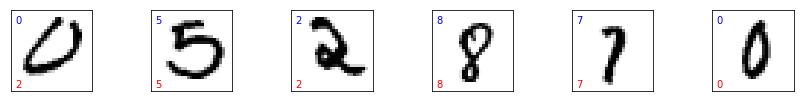

In [119]:
plt.figure(figsize = (70,50))
i_subplot = 1
random_sample = np.random.randint(0, 1000, 6)
predictions = sess.run(tf.argmax(pred,1), feed_dict={x:mnist.test.images[random_sample]})
for i, val in enumerate(random_sample):
    plt.subplot(28,28,i_subplot)
    i_subplot += 1
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(mnist.test.images[val], (28,28)), cmap=plt.cm.binary)
    plt.text(1, 26, str(predictions[i]), color='r')
    plt.text(1, 4, str(np.argmax(mnist.test.labels[val])), color='b')
